# Análise de Dados Estruturais na Região de Altamira, MG

## Importação de Bibliotecas e do Dataset

In [33]:
# Importação de bibliotecas:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [34]:
# Importação do dataset:
path = "/content/drive/My Drive/Colab Notebooks/Datasets/dados_estruturais_altamira.csv"
dataframe = pd.read_csv(path)

In [35]:
# Visualização do dataframe:
dataframe.head()

,PONTO,X,Y,COTA,UNID,LITO,TIPO,DIP_DIR,DIP,GRUPO
0,1,650608.0,7835818.0,1143.0,ESP,QUARTZITO,SN,60.0,50.0,1
1,1,650608.0,7835818.0,1143.0,ESP,QUARTZITO,SN,85.0,75.0,1
2,1,650608.0,7835818.0,1143.0,ESP,QUARTZITO,SN,85.0,78.0,1
3,2,NaN,NaN,NaN,ESP,QUARTZITO,SN,73.0,50.0,1
4,2,NaN,NaN,NaN,ESP,QUARTZITO,SN,72.0,35.0,1


In [36]:
# Criação de cópia do dataset:
df = dataframe.copy()

## Atributos do Dataset

Este dataset consiste em um compilado de dados estruturais coletados em campo por alunos da disciplina de Geologia de Campo, ofertada pelo IGC-UFMG. Seus atributos são:

- **PONTO** --> identificador numérico do ponto visitado

- **X** --> coordenada X em UTM

- **Y** --> coordenada Y em UTM

- **COTA** --> altitude em metros

- **UNID** --> unidade litoestratigráfica
  - *ESP* : Sg. Espinhaço
  - *CBH* : Cx. Belo Horizonte

- **LITO** --> rocha presente no ponto

- **TIPO** --> tipo de estrutura presente no ponto
  - *SN* : Foliação
  - *SN_1* : Foliação Sn+1
  - *S0* : Acamamento
  - *LN* : Lineação
  - *F* : Fratura
  - *E* : Eixo
  - *V* : Veio

- **DIP_DIR** --> sentido de mergulho/caimento da estrutura

- **DIP** --> ângulo de mergulho/plunge da estrutura

- **GRUPO** --> número do relatório de onde as medidas foram extraídas (1 a 7)

## Limpeza e Manipulação de Dataset

- Informações Gerais
- Valores Faltantes
- Contagem de Valores Únicos
- Exclusão de Valores Irrelevantes

### Informações Gerais do Dataset

In [37]:
# Informações gerais sobre o dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PONTO    716 non-null    int64  
 1   X        712 non-null    float64
 2   Y        712 non-null    float64
 3   COTA     654 non-null    float64
 4   UNID     625 non-null    object 
 5   LITO     716 non-null    object 
 6   TIPO     701 non-null    object 
 7   DIP_DIR  701 non-null    float64
 8   DIP      699 non-null    float64
 9   GRUPO    716 non-null    int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 56.1+ KB


### Valores Faltantes

In [38]:
# Número de valores faltantes por atributo:
df.isnull().sum()

PONTO       0
X           4
Y           4
COTA       62
UNID       91
LITO        0
TIPO       15
DIP_DIR    15
DIP        17
GRUPO       0
dtype: int64

### Contagem de Valores Únicos

In [39]:
# Contagem de valores de LITO:
df.LITO.value_counts()

QUARTZITO                467
XISTO                     89
GNAISSE                   64
GRANITO                   30
CONGLOMERADO              28
FILITO                    25
QUARTZITO_EMBASAMENTO      5
FILITO_QUARTZITO           4
MAFICA                     3
V_QUARTZO                  1
Name: LITO, dtype: int64

In [40]:
# Contagem de valores de TIPO:
df.TIPO.value_counts()

SN      378
S0      199
F        64
E        27
LN       25
V         7
SN_1      1
Name: TIPO, dtype: int64

### Exclusão de Valores Irrelevantes

#### Atributo DIP_DIR

- Exclusão de valores com DIP_DIR faltante

- Como a análise é focada essencialmente em dados estruturais, instâncias que apresentam dados estruturais faltantes podem ser descartadas

In [41]:
# Identificando valores faltantes de DIP_DIR:
df.query("DIP_DIR == 'NaN'")

,PONTO,X,Y,COTA,UNID,LITO,TIPO,DIP_DIR,DIP,GRUPO
8,4,650449.0,7835993.0,1251.0,ESP,QUARTZITO,NaN,NaN,NaN,1
9,5,650449.0,7836175.0,1274.0,ESP,QUARTZITO,NaN,NaN,NaN,1
10,6,650200.0,7836343.0,1269.0,ESP,QUARTZITO,NaN,NaN,NaN,1
20,11,652000.0,7833212.0,1101.0,ESP,V_QUARTZO,NaN,NaN,NaN,1
70,20,652689.0,7836420.0,1234.0,ESP,QUARTZITO,NaN,NaN,NaN,1
73,22,650054.0,7834640.0,989.0,ESP,QUARTZITO,NaN,NaN,NaN,1
74,23,649468.0,7834632.0,1067.0,ESP,QUARTZITO,NaN,NaN,NaN,1
75,24,648930.0,7835991.0,1075.0,CBH,GNAISSE,NaN,NaN,NaN,1
76,25,648826.0,7836011.0,1096.0,NaN,MAFICA,NaN,NaN,NaN,1
77,26,648585.0,7836054.0,1161.0,ESP,CONGLOMERADO,NaN,NaN,NaN,1


In [42]:
# Índices dos valores faltantes de DIP_DIR:
MV_dip_dir = list(df.query("DIP_DIR == 'NaN'").index)

In [43]:
# Excluindo valores faltantes de DIP_DIR:
df.drop(labels=MV_dip_dir,axis=0,inplace=True)

# Verificando se os valores foram dropados:
df.DIP_DIR.isnull().sum()

0

#### Atributo TIPO

- Exclusão de instâncias que apresentam uma ou duas ocorrências apenas de determinado TIPO de estrutura

In [44]:
# Indentificando valores TIPO = V:
df.query("TIPO == 'SN_1'")

,PONTO,X,Y,COTA,UNID,LITO,TIPO,DIP_DIR,DIP,GRUPO
39,16,651809.0,7836257.0,983.0,CBH,GNAISSE,SN_1,76.0,55.0,1


In [45]:
# Excluindo valores de TIPO = SN_1:
df.drop([39],axis=0,inplace=True)

## Criação de Variáveis para Estruturas Planares e Lineares

Criação das seguintes variáveis que representam DIPDIR e DIP das estruturas planares e lineares, sendo elas:
- **SN** --> Foliação (Geral)
- **SN_ESP** --> Foliação (Sg. Espinhaço)
- **SN_CBH** --> Foliação (Cx. Belo Horizonte)
- **S0** --> Acamamento (presente apenas no Sg. Espinhaço)
- **LN** --> Lineação (Geral)
- **LN_ESP** --> Lineação (Sg. Espinhaço)
- **LN_CBH** --> Lineação (Cx. Belo Horizonte)
- **F** --> Fratura
- **E** --> Eixo
- **V** --> Veio



In [46]:
# Atitudes de foliação (geral):
SN = df.query("TIPO == 'SN'")[['DIP_DIR','DIP']]

In [47]:
# Atitudes de foliação (Sg. Espinhaço):
SN_ESP = df.query("TIPO == 'SN' & UNID == 'ESP'")[['DIP_DIR','DIP']]

In [48]:
# Atitudes de foliação (Cx. Belo Horizonte):
SN_CBH = df.query("TIPO == 'SN' & UNID == 'CBH'")[['DIP_DIR','DIP']]

In [49]:
# Atitudes de acamamento (apenas presentes no Sg. Espinhaço):
S0 = df.query("TIPO == 'S0'")[['DIP_DIR','DIP']]

In [50]:
# Atitudes de lineação (geral):
LN = df.query("TIPO == 'LN'")[['DIP_DIR','DIP']]

In [51]:
# Atitudes de lineação (Sg. Espinhaço):
LN_ESP = df.query("TIPO == 'LN' & UNID == 'ESP'")[['DIP_DIR','DIP']]

In [52]:
# Atitudes de lineação (Cx. Belo Horizonte):
LN_CBH = df.query("TIPO == 'LN' & UNID == 'CBH'")[['DIP_DIR','DIP']]

In [53]:
# Atitudes de fratura:
F = df.query("TIPO == 'F'")[['DIP_DIR','DIP']]

In [54]:
# Atitudes de eixo:
E = df.query("TIPO == 'E'")[['DIP_DIR','DIP']]

In [55]:
# Atitudes de veio:
V = df.query("TIPO == 'V'")[['DIP_DIR','DIP']]

## Funções Auxiliares

- Criação de funções que auxiliarão a análise dos dados estruturais

### Função Direção da Camada

- Função que transforma DIP_DIR em direção da camada estandardizada em 0° a 179°

In [56]:
def direcao (dip_dir):
  if 0 <= dip_dir < 90:
    return dip_dir + 90
  elif 90 <= dip_dir < 180:
    return dip_dir - 90
  elif 180 <= dip_dir < 270:
    return dip_dir - 90
  else:
    return dip_dir - 270 

In [57]:
# Criação do atributo DIRECAO, que representa a direção dos planos das estruturas:
S0['DIRECAO'] = S0['DIP_DIR'].map(direcao)
SN_ESP['DIRECAO'] = SN_ESP['DIP_DIR'].map(direcao)
SN_CBH['DIRECAO'] = SN_CBH['DIP_DIR'].map(direcao)
SN['DIRECAO'] = SN['DIP_DIR'].map(direcao)

### Função Padronização de Trend

- Função que padroniza o trend de estruturas para valores entre 0° e 179°.

In [58]:
def padronizar (trend):
  if trend > 180:
    return trend - 180
  else:
    return trend 

## Medidas Estruturais (Sem Divisão por Domínios)

### Gráficos de Barras

- Frequência Absoluta - LITO

- Frequência Relativa - LITO

- Frequência Absoluta - TIPO

#### Frequência Absoluta de Ocorrência de Litologias

In [59]:
temp = list(dataframe.query("LITO == 'V_QUARTZO' | LITO == 'FILITO_QUARTZITO' | LITO == 'QUARTZITO_EMBASAMENTO'").index)
df_temp = dataframe.drop(labels=temp,axis=0)

In [60]:
# Frequência absoluta:
freq_abs =  list(df_temp.LITO.value_counts().values)

In [61]:
# Criação das labels das barras:
bar = ['Quartzito','Xisto','Gnaisse','Granito','Conglomerado','Filito','Máfica']

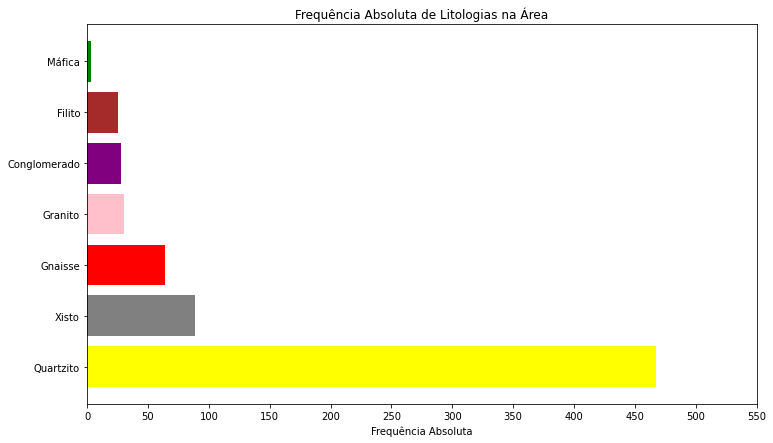

In [62]:
# Criação do gráfico de barras para LITO - frequência absoluta:
plt.figure(figsize=(12,7))
cores = ['yellow', 'gray', 'red', 'pink', 'purple','brown','green']
plt.barh(bar, freq_abs,color = cores)
plt.title ("Frequência Absoluta de Litologias na Área")
plt.xticks(np.arange(0,600,50))
plt.xlabel("Frequência Absoluta")

#plt.savefig("bar_lito_abs.jpg",dpi=300,format="jpg",bbox_inches="tight")
plt.show()

#### Frequência Relativa de Ocorrência de Litologias

In [63]:
# Frequência Relativa (%) dos litotipos:
contagem = df_temp.LITO.value_counts()
print("Frequência Relativa Percentual de Litologias na Área:")
print()
freq_rel = []
for i in range(len(contagem)):
  pc = int(round(((contagem.values[i]/contagem.values.sum())*100),0))
  freq_rel.append(pc)
  print("\t {} ~ {}% ".format(contagem.index[i],pc))
print("-"*10)

Frequência Relativa Percentual de Litologias na Área:

	 QUARTZITO ~ 66% 
	 XISTO ~ 13% 
	 GNAISSE ~ 9% 
	 GRANITO ~ 4% 
	 CONGLOMERADO ~ 4% 
	 FILITO ~ 4% 
	 MAFICA ~ 0% 
----------


In [64]:
# Lista de frequência relativa:
freq_rel

[66, 13, 9, 4, 4, 4, 0]

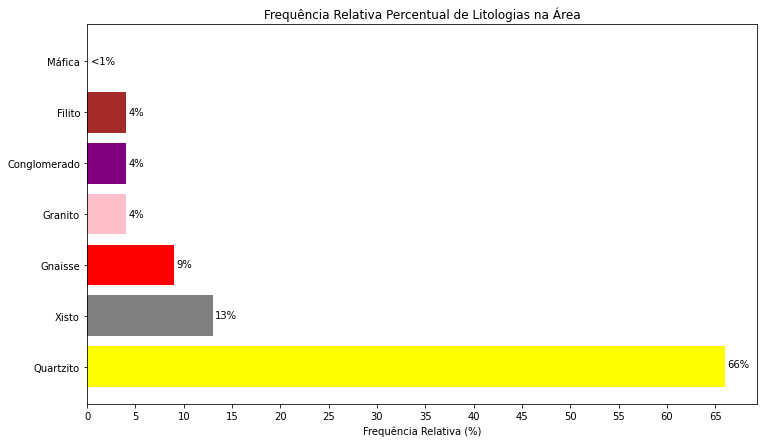

In [65]:
# Criação do gráfico de barras para LITO - frequência relativa:
plt.figure(figsize=(12,7))
cores = ['yellow', 'gray', 'red', 'pink', 'purple','brown','green']
plt.barh(bar, freq_rel,color = cores)
plt.title ("Frequência Relativa Percentual de Litologias na Área")
plt.xticks(np.arange(0,70,5))
plt.xlabel("Frequência Relativa (%)")
plt.annotate("66%",(66.3,0))
plt.annotate("13%",(13.2,0.95))
plt.annotate("9%",(9.2,1.95))
plt.annotate("4%",(4.3,2.95))
plt.annotate("4%",(4.3,3.95))
plt.annotate("4%",(4.3,4.95))
plt.annotate("<1%",(0.4,5.95))

#plt.savefig("bar_lito_rel.jpg",dpi=300,format="jpg",bbox_inches="tight")
plt.show()

#### Frequência Absoluta de Ocorrência dos Tipos de Estrutura

- Percebe-se que apenas as medidas de acamamento e foliação apresentam representatividade estatística para desenvolver as análises posteriores

In [66]:
# Criando variável que armazena as frequências absolutas dos tipos de estrutura:
freq_abs = (list(df_temp.TIPO.value_counts().values))[:-1]

In [67]:
# Criação das labels das barras:
bar = ['Foliação','Acamamento','Fratura','Eixo','Lineação','Veio']

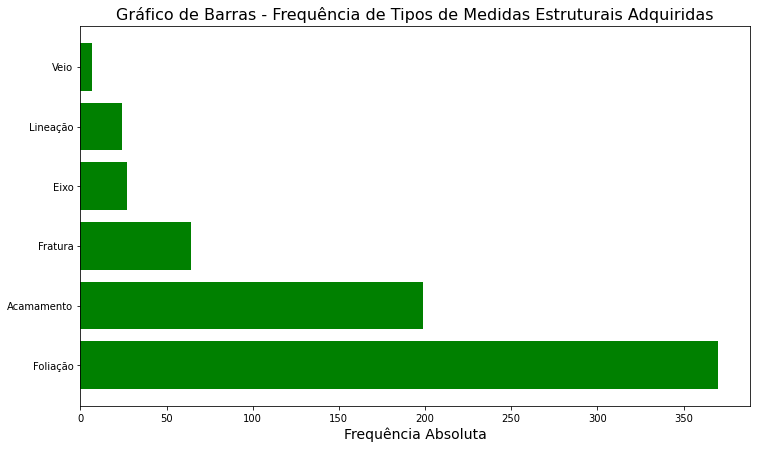

In [68]:
# Criação do gráfico de barras:
plt.figure(figsize=(12,7))
plt.barh(bar,freq_abs,color="green")
plt.title ("Gráfico de Barras - Frequência de Tipos de Medidas Estruturais Adquiridas",size=16)
plt.xticks(np.arange(0,400,50))
plt.xlabel("Frequência Absoluta",size=14)

#plt.savefig("bar_tipo_abs.jpg",dpi=300,format="jpg",bbox_inches="tight")
plt.show()

### Sumário Estatístico

- S0
- SN_ESP
- SN_CBH

In [69]:
# Sumário Estatístico - SN_ESP:
print("Sumário Estatístico - SN_ESP:")
print(round(SN_ESP.describe(),0))
print("Moda     ",SN_ESP.DIP_DIR.mode().values[0]," ",SN_ESP.DIP.mode().values[0])

# Sumário Estatístico - SN_CBH:
print("\n Sumário Estatístico - SN_CBH:")
print(round(SN_CBH.describe(),0))
print("Moda     ",SN_CBH.DIP_DIR.mode().values[0]," ",SN_CBH.DIP.mode().values[0])

# Sumário Estatístico - S0:
print("\n Sumário Estatístico - S0:")
print(round(S0.describe(),0))
print("Moda     ",S0.DIP_DIR.mode()[0:3].values[2]," ",S0.DIP.mode().values[0])
print("Moda     ",S0.DIP_DIR.mode()[0:3].values[0]," ",S0.DIP.mode().values[0])
print("Moda     ",S0.DIP_DIR.mode()[0:3].values[1]," ",S0.DIP.mode().values[0])



Sumário Estatístico - SN_ESP:
       DIP_DIR    DIP  DIRECAO
count    246.0  246.0    246.0
mean      96.0   52.0     67.0
std       30.0   16.0     75.0
min       25.0   15.0      0.0
25%       85.0   40.0      5.0
50%       92.0   50.0     17.0
75%      100.0   64.0    163.0
max      290.0   89.0    179.0
Moda      90.0   50.0

 Sumário Estatístico - SN_CBH:
       DIP_DIR   DIP  DIRECAO
count     50.0  50.0     50.0
mean     118.0  46.0     50.0
std       54.0  16.0     51.0
min       31.0  20.0      0.0
25%       92.0  37.0     10.0
50%      112.0  41.0     40.0
75%      134.0  54.0     52.0
max      318.0  78.0    177.0
Moda      90.0   39.0

 Sumário Estatístico - S0:
       DIP_DIR    DIP  DIRECAO
count    199.0  199.0    199.0
mean     111.0   46.0     84.0
std       72.0   18.0     67.0
min        0.0    8.0      0.0
25%       70.0   30.0     20.0
50%       93.0   45.0     58.0
75%      125.0   60.0    150.0
max      355.0   83.0    179.0
Moda      90.0   45.0
Moda      55.0  

### Histogramas

- S0
- SN
- S_ESP + SN_CBH

#### S0 (Geral)

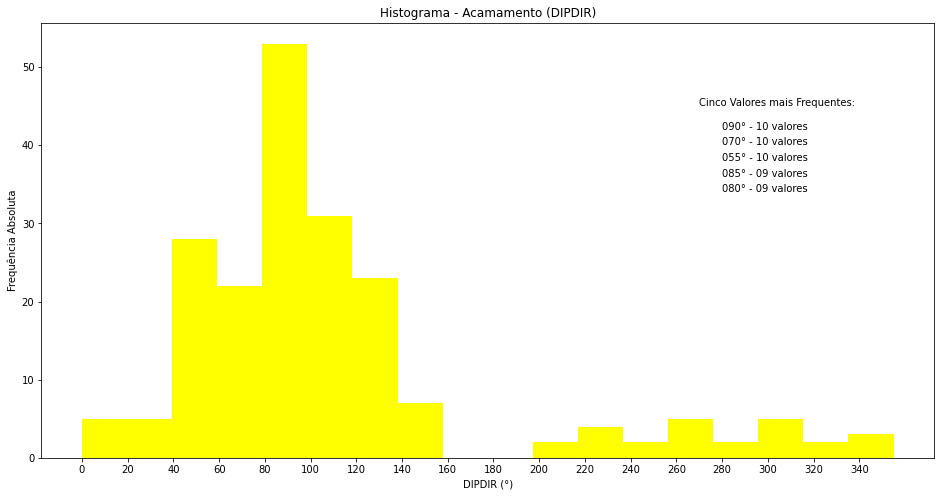

In [70]:
# Histograma DIP_DIR:

m1 = S0.DIP_DIR.value_counts().index[0]
m2 = S0.DIP_DIR.value_counts().index[1]
m3 = S0.DIP_DIR.value_counts().index[2]
m4 = S0.DIP_DIR.value_counts().index[3]
m5 = S0.DIP_DIR.value_counts().index[4]

# Histograma S0 (DIPDIR):
plt.figure(figsize=(16,8))
plt.hist(S0.DIP_DIR,bins=18,color="yellow")
plt.xticks(np.arange(0,360,20))
plt.title("Histograma - Acamamento (DIPDIR)")
plt.xlabel("DIPDIR (°)")
plt.ylabel("Frequência Absoluta")
plt.annotate("Cinco Valores mais Frequentes:",xy=(270,45))
plt.annotate(f"0{int(m2)}° - 10 valores",xy=(280,42))
plt.annotate(f"0{int(m3)}° - 10 valores",xy=(280,40))
plt.annotate(f"0{int(m1)}° - 10 valores",xy=(280,38))
plt.annotate(f"0{int(m4)}° - 09 valores",xy=(280,36))
plt.annotate(f"0{int(m5)}° - 09 valores",xy=(280,34))

#plt.savefig("hist_S0_dipdir.jpg",dpi=300,format="jpg",bbox_inches="tight")
plt.show()

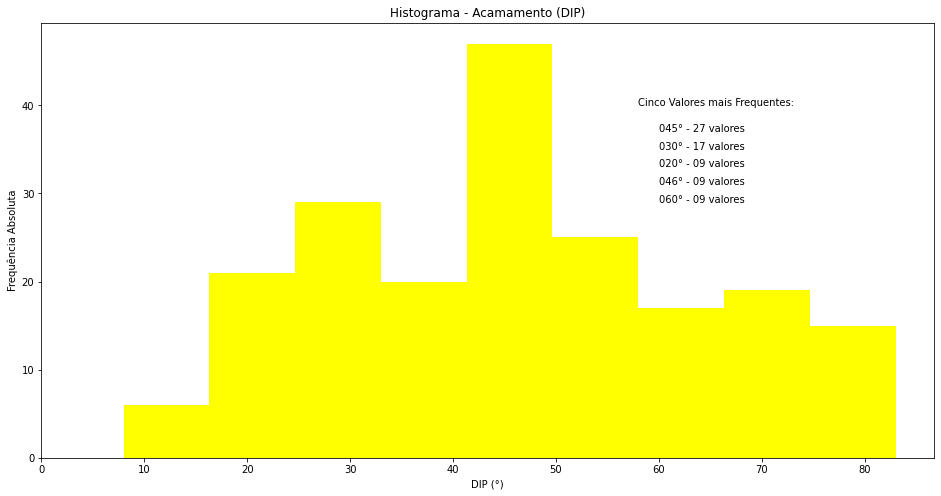

In [71]:
# Histograma DIP:

m1 = S0.DIP.value_counts().index[0]
m2 = S0.DIP.value_counts().index[1]
m3 = S0.DIP.value_counts().index[2]
m4 = S0.DIP.value_counts().index[3]
m5 = S0.DIP.value_counts().index[4]

# Histograma S0 (DIP):
plt.figure(figsize=(16,8))
plt.hist(S0.DIP,bins=9,color="yellow")
plt.xticks(np.arange(0,90,10))
plt.title("Histograma - Acamamento (DIP)")
plt.xlabel("DIP (°)")
plt.ylabel("Frequência Absoluta")
plt.annotate("Cinco Valores mais Frequentes:",xy=(58,40))
plt.annotate(f"0{int(m1)}° - 27 valores",xy=(60,37))
plt.annotate(f"0{int(m2)}° - 17 valores",xy=(60,35))
plt.annotate(f"0{int(m3)}° - 09 valores",xy=(60,33))
plt.annotate(f"0{int(m4)}° - 09 valores",xy=(60,31))
plt.annotate(f"0{int(m5)}° - 09 valores",xy=(60,29))

#plt.savefig("hist_S0_dip.jpg",dpi=300,format="jpg",bbox_inches="tight")
plt.show()

#### Sn (Geral)

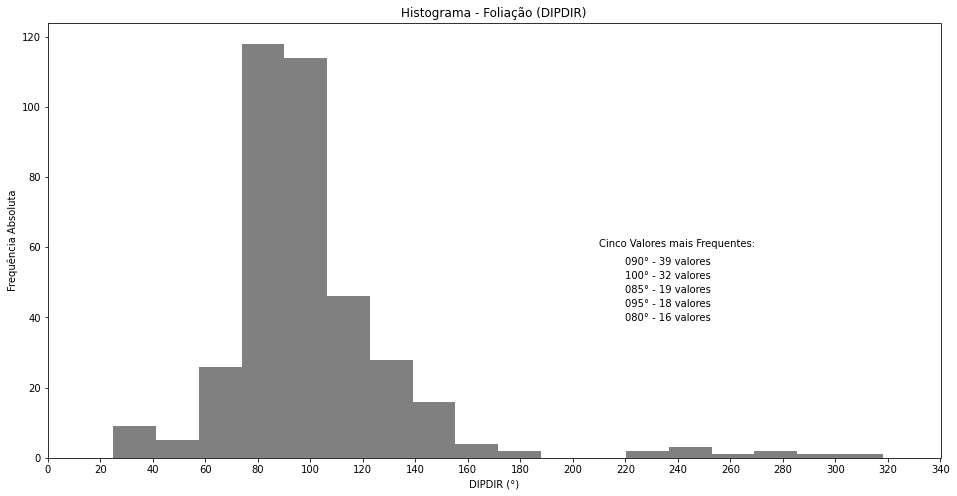

In [72]:
# Histograma DIP_DIR:

m1 = SN.DIP_DIR.value_counts().index[0]
m2 = SN.DIP_DIR.value_counts().index[1]
m3 = SN.DIP_DIR.value_counts().index[2]
m4 = SN.DIP_DIR.value_counts().index[3]
m5 = SN.DIP_DIR.value_counts().index[4]

# Histograma Sn (DIPDIR):
plt.figure(figsize=(16,8))
plt.hist(SN.DIP_DIR,bins=18,color="gray")
plt.xticks(np.arange(0,360,20))
plt.title("Histograma - Foliação (DIPDIR)")
plt.xlabel("DIPDIR (°)")
plt.ylabel("Frequência Absoluta")
plt.annotate("Cinco Valores mais Frequentes:",xy=(210,60))
plt.annotate(f"0{int(m1)}° - 39 valores",xy=(220,55))
plt.annotate(f"{int(m2)}° - 32 valores",xy=(220,51))
plt.annotate(f"0{int(m3)}° - 19 valores",xy=(220,47))
plt.annotate(f"0{int(m4)}° - 18 valores",xy=(220,43))
plt.annotate(f"0{int(m5)}° - 16 valores",xy=(220,39))

#plt.savefig("hist_SN_dipdir.jpg",dpi=300,format="jpg",bbox_inches="tight")
plt.show()

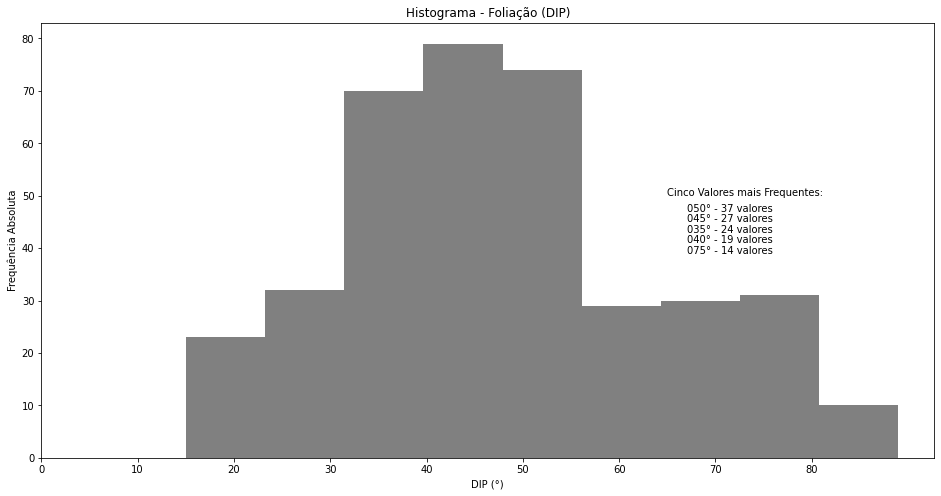

In [73]:
# Histograma DIP:

m1 = SN.DIP.value_counts().index[0]
m2 = SN.DIP.value_counts().index[1]
m3 = SN.DIP.value_counts().index[2]
m4 = SN.DIP.value_counts().index[3]
m5 = SN.DIP.value_counts().index[4]

# Histograma Sn (DIP):
plt.figure(figsize=(16,8))
plt.hist(SN.DIP,bins=9,color="gray")
plt.xticks(np.arange(0,90,10))
plt.title("Histograma - Foliação (DIP)")
plt.xlabel("DIP (°)")
plt.ylabel("Frequência Absoluta")
plt.annotate("Cinco Valores mais Frequentes:",xy=(65,50))
plt.annotate(f"0{int(m1)}° - 37 valores",xy=(67,47))
plt.annotate(f"0{int(m2)}° - 27 valores",xy=(67,45))
plt.annotate(f"0{int(m3)}° - 24 valores",xy=(67,43))
plt.annotate(f"0{int(m4)}° - 19 valores",xy=(67,41))
plt.annotate(f"0{int(m5)}° - 14 valores",xy=(67,39))

#plt.savefig("hist_SN_dip.jpg",dpi=300,format="jpg",bbox_inches="tight")
plt.show()

#### Sn_ESP + Sn_CBH

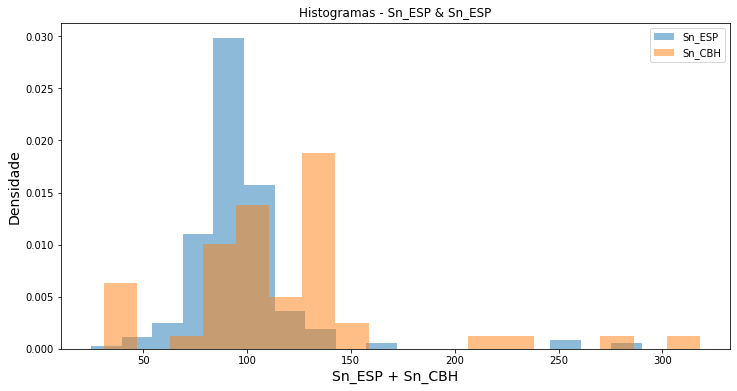

In [120]:
# Histogramas DIP_DIR:

plt.figure(figsize=(12,6))
plt.hist(SN_ESP.DIP_DIR, bins=18, alpha=0.5, label="Sn_ESP",density=True,
         stacked=True)
plt.hist(SN_CBH.DIP_DIR, bins=18, alpha=0.5, label="Sn_CBH",density=True,
         stacked=True)

plt.xlabel("Sn_ESP + Sn_CBH", size=14)
plt.ylabel("Densidade", size=14)
plt.title("Histogramas - Sn_ESP & Sn_ESP")
plt.legend(loc='upper right')
plt.show()

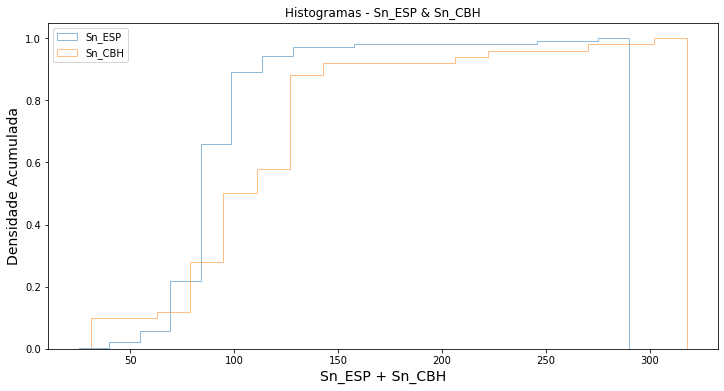

In [121]:
# Curvas de frequência acumulada DIP_DIR:
plt.figure(figsize=(12,6))
plt.hist(SN_ESP.DIP_DIR, bins=18, alpha=0.5, label="Sn_ESP",stacked=True,
         cumulative=True,density=True,histtype="step")
plt.hist(SN_CBH.DIP_DIR, bins=18, alpha=0.5, label="Sn_CBH",stacked=True,
         cumulative=True,density=True,histtype="step")

plt.xlabel("Sn_ESP + Sn_CBH", size=14)
plt.ylabel("Densidade Acumulada", size=14)
plt.title("Histogramas - Sn_ESP & Sn_CBH")
plt.legend(loc='upper left')
plt.show()

## Medidas Estruturais - Domínios E e W

- Enquanto a porção E conta com 655 instâncias, a porção W apresenta apenas 37 exemplos

- Então, não há representatividade em questão de tamanho de amostra para a porção W

- Nesse sentido, como os domínios encontram-se desbalanceados em questões de amostras, não é possível compará-los do ponto de vista estatístico para verificar se existem semelhanças entre as duas amostras

- Portanto, como não é possível comparar as estatísticas entre as amostras da porção E e W da área, deverá ser realizada a comparação dos lineamentos traçados para cada um dos compartimentos

In [76]:
# Importação dados estruturais porção E:
path10 = "/content/drive/My Drive/Colab Notebooks/Datasets/PONTOS_E.csv"
df_E = pd.read_csv(path10, header=0,sep=",",index_col=False)

# Importação dados estruturais porção W:
path11 = "/content/drive/My Drive/Colab Notebooks/Datasets/PONTOS_W.csv"
df_W = pd.read_csv(path11, header=0,sep=",",index_col=False)

In [77]:
# Excluindo colunas desnecessárias:
df_E.drop(["FID","PID"],axis=1,inplace=True)
df_W.drop(["FID","PID"],axis=1,inplace=True)

In [78]:
# Informações gerais sobre os dados da porção E:
df_E.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PONTO    655 non-null    int64 
 1   UNID     586 non-null    object
 2   LITO     655 non-null    object
 3   TIPO     655 non-null    object
 4   DIP_DIR  655 non-null    int64 
 5   DIP      655 non-null    int64 
 6   GRUPO    655 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 35.9+ KB


In [79]:
# Informações gerais sobre os dados da porção W:
df_W.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PONTO    37 non-null     int64 
 1   UNID     22 non-null     object
 2   LITO     37 non-null     object
 3   TIPO     37 non-null     object
 4   DIP_DIR  37 non-null     int64 
 5   DIP      37 non-null     int64 
 6   GRUPO    37 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 2.1+ KB


In [80]:
# Atitudes de foliação na porção W:
SN_W = df_W.query("TIPO == 'SN'")[["DIP_DIR","DIP"]]

# Atitudes de foliação do Espinhaço na porção W:
SN_ESP_W = df_W.query("UNID == 'ESP' & TIPO == 'SN'")[["DIP_DIR","DIP"]]

# Atitudes de foliação do Cx. Belo Horizonte na porção W:
SN_CBH_W = df_W.query("UNID == 'CBH' & TIPO == 'SN'")[["DIP_DIR","DIP"]]

# Atitudes de acamamento na porção W:
S0_W = df_W.query("TIPO == 'S0'")[["DIP_DIR","DIP"]]

In [81]:
# Atitudes de foliação na porção E:
SN_E = df_E.query("TIPO == 'SN'")[["DIP_DIR","DIP"]]

# Atitudes de foliação do Espinhaço na porção E:
SN_ESP_E = df_E.query("UNID == 'ESP' & TIPO == 'SN'")[["DIP_DIR","DIP"]]

# Atitudes de foliação do Cx. Belo Horizonte na porção E:
SN_CBH_E = df_E.query("UNID == 'CBH' & TIPO == 'SN'")[["DIP_DIR","DIP"]]

# Atitudes de acamamento na porção E:
S0_E = df_E.query("TIPO == 'S0'")[["DIP_DIR","DIP"]]

In [82]:
## Aplicando função para criar atributo de direção das estruturas:

# Estruturas do domínio E:
S0_E['DIRECAO'] = S0_E['DIP_DIR'].map(direcao)
SN_ESP_E['DIRECAO'] = SN_ESP_E['DIP_DIR'].map(direcao)
SN_CBH_E['DIRECAO'] = SN_CBH_E['DIP_DIR'].map(direcao)
SN_E['DIRECAO'] = SN_E['DIP_DIR'].map(direcao)

# Estruturas do domínio W:
S0_W['DIRECAO'] = S0_W['DIP_DIR'].map(direcao)
SN_ESP_W['DIRECAO'] = SN_ESP_W['DIP_DIR'].map(direcao)
SN_CBH_W['DIRECAO'] = SN_CBH_W['DIP_DIR'].map(direcao)
SN_W['DIRECAO'] = SN_W['DIP_DIR'].map(direcao)

### Sumários Estatísticos

- S0 (E)
- S0 (W)
- SN_ESP (E)
- SN_ESP (W)
- SN_CBH (E)
- SN_CBH (W)

In [83]:
# Sumário Estatístico Acamamento - Porções W e E:

print("Sumário Estatístico - S0 (E):")
print(S0_E.describe())

print("\n Sumário Estatístico - S0 (W):")
print(S0_W.describe())

Sumário Estatístico - S0 (E):
          DIP_DIR         DIP     DIRECAO
count  193.000000  193.000000  193.000000
mean   110.901554   46.471503   86.186528
std     72.929801   17.360770   67.201938
min      0.000000    8.000000    0.000000
25%     70.000000   30.000000   20.000000
50%     92.000000   45.000000   85.000000
75%    125.000000   60.000000  151.000000
max    355.000000   83.000000  179.000000

 Sumário Estatístico - S0 (W):
          DIP_DIR        DIP    DIRECAO
count    6.000000   6.000000   6.000000
mean   113.333333  17.833333  23.333333
std      6.831301   4.708149   6.831301
min    100.000000  12.000000  10.000000
25%    115.000000  15.000000  25.000000
50%    115.000000  17.500000  25.000000
75%    115.000000  20.000000  25.000000
max    120.000000  25.000000  30.000000


In [84]:
# Sumário Estatístico Foliação Espinhaço - Porções E e W:

print("Sumário Estatístico - Sn Espinhaço (E):")
print(SN_ESP_E.describe())

print("\n Sumário Estatístico - Sn Espinhaço (W):")
print(SN_ESP_W.describe())

Sumário Estatístico - Sn Espinhaço (E):
          DIP_DIR         DIP     DIRECAO
count  230.000000  230.000000  230.000000
mean    96.426087   51.817391   68.252174
std     31.173010   15.641219   75.347445
min     25.000000   15.000000    0.000000
25%     85.000000   40.000000    5.000000
50%     92.000000   50.000000   19.000000
75%    101.500000   64.000000  163.000000
max    290.000000   88.000000  179.000000

 Sumário Estatístico - Sn Espinhaço (W):
          DIP_DIR        DIP    DIRECAO
count   13.000000  13.000000   13.00000
mean    91.153846  49.538462   15.00000
std      5.942028  21.550775   45.53021
min     76.000000  22.000000    0.00000
25%     90.000000  35.000000    0.00000
50%     90.000000  45.000000    0.00000
75%     93.000000  60.000000    6.00000
max    100.000000  89.000000  166.00000


In [85]:
# Sumário Estatístico Foliação CBH - Porções E e W:

print("Sumário Estatístico - Sn CBH (E):")
print(SN_CBH_E.describe())

print("\n Sumário Estatístico - Sn CBH (W):")
print(SN_CBH_W.describe())

Sumário Estatístico - Sn CBH (E):
          DIP_DIR        DIP     DIRECAO
count   48.000000  48.000000   48.000000
mean   118.895833  45.604167   51.395833
std     54.784390  16.666618   51.328620
min     31.000000  20.000000    0.000000
25%     91.000000  37.000000   10.000000
50%    114.500000  41.000000   40.000000
75%    135.000000  55.250000   52.750000
max    318.000000  78.000000  177.000000

 Sumário Estatístico - Sn CBH (W):
          DIP_DIR        DIP    DIRECAO
count    2.000000   2.000000   2.000000
mean   101.000000  46.500000  11.000000
std      1.414214   3.535534   1.414214
min    100.000000  44.000000  10.000000
25%    100.500000  45.250000  10.500000
50%    101.000000  46.500000  11.000000
75%    101.500000  47.750000  11.500000
max    102.000000  49.000000  12.000000


## Comparação entre Lineamentos dos Compartimentos E e W

In [86]:
# Importação Lineamentos Negativos (Total):
path1 = "/content/drive/My Drive/Colab Notebooks/Datasets/Lineamentos Adensados Altamira/L_NEG_TOTAL.txt"
lin_neg_tot = pd.read_csv(path1,header=0,sep="\t",index_col=False)

# Importação Lineamentos Positivos (Total):
path2 = "/content/drive/My Drive/Colab Notebooks/Datasets/Lineamentos Adensados Altamira/L_POSI_TOTAL.txt"
lin_pos_tot = pd.read_csv(path2,header=0,sep="\t",index_col=False)

# Importação Lineamentos Negativos (W):
path3 = "/content/drive/My Drive/Colab Notebooks/Datasets/Lineamentos Adensados Altamira/L_NEG_W.txt"
lin_neg_w = pd.read_csv(path3,header=0,sep="\t",index_col=False)

# Importação Lineamentos Positivos (W):
path4 = "/content/drive/My Drive/Colab Notebooks/Datasets/Lineamentos Adensados Altamira/L_POSI_W.txt"
lin_pos_w = pd.read_csv(path4,header=0,sep="\t",index_col=False)

# Importação Lineamentos Negativos (E):
path5 = "/content/drive/My Drive/Colab Notebooks/Datasets/Lineamentos Adensados Altamira/L_NEG_E.txt"
lin_neg_e = pd.read_csv(path5,header=0,sep="\t",index_col=False)

# Importação Lineamentos Positivos (E):
path6 = "/content/drive/My Drive/Colab Notebooks/Datasets/Lineamentos Adensados Altamira/L_POSI_E.txt"
lin_pos_e = pd.read_csv(path6,header=0,sep="\t",index_col=False)

In [87]:
# Aplicação da função que padroniza o trend dos lineamentos:
lin_pos_e['TREND_PADRONIZADO'] = lin_pos_e['TREND'].map(padronizar)
lin_pos_w['TREND_PADRONIZADO'] = lin_pos_w['TREND'].map(padronizar)
lin_neg_e['TREND_PADRONIZADO'] = lin_neg_e['TREND'].map(padronizar)
lin_neg_w['TREND_PADRONIZADO'] = lin_neg_w['TREND'].map(padronizar)
lin_pos_tot['TREND_PADRONIZADO'] = lin_pos_tot['TREND'].map(padronizar)
lin_neg_tot['TREND_PADRONIZADO'] = lin_neg_tot['TREND'].map(padronizar)

### Sumário Estatístico

In [88]:
# Sumário Lineamentos Positivos:
print("Sumário Estatístico - Lineamentos Positivos (E):")
print(lin_pos_e.describe())

print("\n Sumário Estatístico - Lineamentos Positivos (W):")
print(lin_pos_w.describe())

Sumário Estatístico - Lineamentos Positivos (E):
            TREND  PLUNGE  TREND_PADRONIZADO
count  925.000000   925.0         925.000000
mean   187.407568     0.0          91.667027
std    152.478965     0.0          65.160918
min      1.000000     0.0           1.000000
25%     26.000000     0.0          26.000000
50%    283.000000     0.0         103.000000
75%    339.000000     0.0         159.000000
max    359.000000     0.0         179.000000

 Sumário Estatístico - Lineamentos Positivos (W):
            TREND  PLUNGE  TREND_PADRONIZADO
count  707.000000   707.0         707.000000
mean   213.256011     0.0         101.487977
std    142.095580     0.0          58.521741
min      1.000000     0.0           1.000000
25%     51.000000     0.0          51.000000
50%    295.000000     0.0         115.000000
75%    334.000000     0.0         154.000000
max    359.000000     0.0         179.000000


### Lineamentos Positivos W x Lineamentos Positivos E

- Embora os histogramas aparentam ser semelhantes, a realização do Teste de Kolmogorov-Smirnov mostra que as amostras (lineamentos positivos W e lineamentos positivos E) **NÃO pertencem à mesma distribuição**.

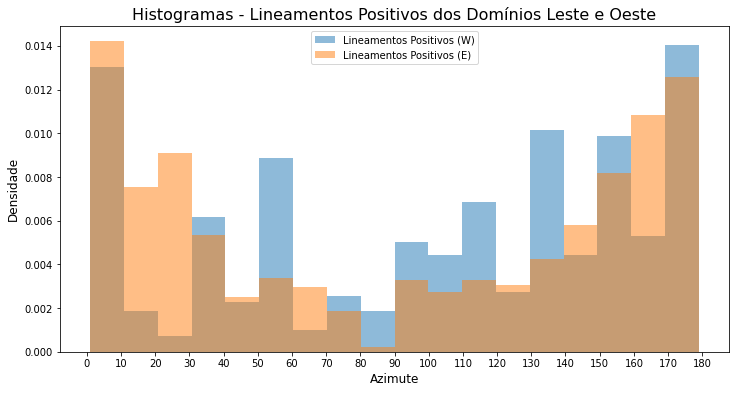

In [89]:
# Histograma:
plt.figure(figsize=(12,6))
plt.hist(lin_pos_w.TREND_PADRONIZADO, bins=18, alpha=0.5, label="Lineamentos Positivos (W)",
         density=True)
plt.hist(lin_pos_e.TREND_PADRONIZADO, bins=18, alpha=0.5, label="Lineamentos Positivos (E)",
         density=True)

plt.xlabel("Azimute", size=12)
plt.xticks(np.arange(0,190,step=10))
plt.ylabel("Densidade", size=12)
plt.title("Histogramas - Lineamentos Positivos dos Domínios Leste e Oeste",
          size=16)
plt.legend(loc='upper center')

#plt.savefig("hist_lin_pos_E_W.jpg",dpi=300,format="jpg",bbox_inches="tight")
plt.show()

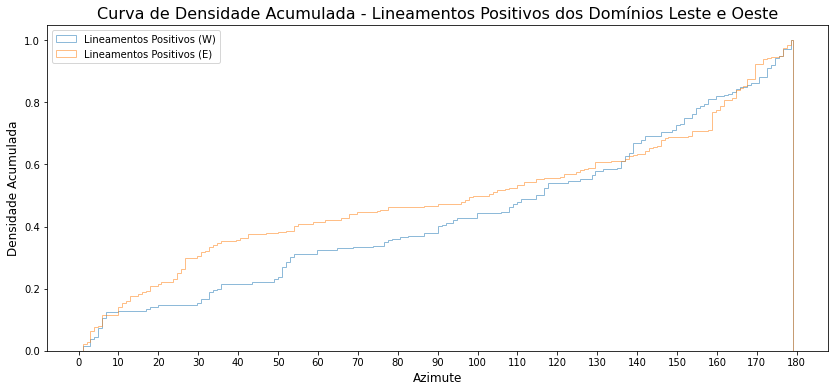

In [90]:
# Curva de Densidade Acumulada:
plt.figure(figsize=(14,6))
plt.hist(lin_pos_w.TREND_PADRONIZADO, bins=360, alpha=0.5, label="Lineamentos Positivos (W)",
         cumulative=True,density=True,histtype="step")
plt.hist(lin_pos_e.TREND_PADRONIZADO, bins=360, alpha=0.5, label="Lineamentos Positivos (E)",
         cumulative=True,density=True,histtype="step")

plt.xlabel("Azimute", size=12)
plt.xticks(np.arange(0,190,step=10))
plt.ylabel("Densidade Acumulada", size=12)
plt.title("Curva de Densidade Acumulada - Lineamentos Positivos dos Domínios Leste e Oeste",
          size=16)
plt.legend(loc='upper left')

plt.savefig("cum_lin_pos_E_W.jpg",dpi=300,format="jpg",bbox_inches="tight")
#plt.show()

#### Teste de Kolmogorov-Smirnov Biamostral

- Esse teste fora executado para verificar se os lineamentos positivos das porções E e W pertencem a uma mesma distribuição

- Pode ser realizados para variáveis discretas

- **H0**: as duas amostras são oriundas da mesma distribuição

- **Ha**: as duas amostras NÃO são oriundas da mesma distribuição

- **Conclusão**: como **p-valor <<< 0.01**, há fortes evidências para **REJEITAR** H0. Portanto, os lineamentos positivos das porções E e W não pertencem a uma mesma distribuição e não podem ser tratados como um só grupo

In [91]:
# Teste de Kolmogorov-Smirnov:
stats.ks_2samp(data1=lin_pos_w.TREND,data2=lin_pos_e.TREND)

Ks_2sampResult(statistic=0.16014220727092016, pvalue=1.9083776781059214e-09)

### Lineamentos Negativos W x Lineamentos Negativos E

- Embora os histogramas aparentam ser semelhantes, a realização do Teste de Kolmogorov-Smirnov mostra que as amostras (lineamentos positivos W e lineamentos positivos E) **NÃO pertencem à mesma distribuição.

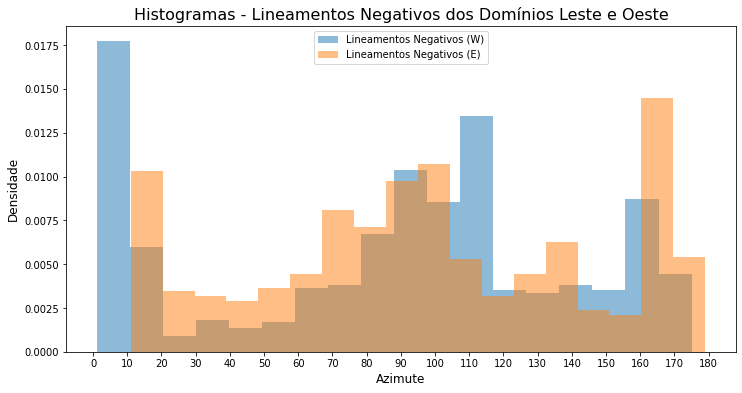

In [92]:
# Histograma:
plt.figure(figsize=(12,6))
plt.hist(lin_neg_w.TREND_PADRONIZADO, bins=18, alpha=0.5, label="Lineamentos Negativos (W)",
         density=True)
plt.hist(lin_neg_e.TREND_PADRONIZADO, bins=18, alpha=0.5, label="Lineamentos Negativos (E)",
         density=True)

plt.xlabel("Azimute", size=12)
plt.xticks(np.arange(0,190,step=10))
plt.ylabel("Densidade", size=12)
plt.title("Histogramas - Lineamentos Negativos dos Domínios Leste e Oeste",
          size=16)
plt.legend(loc='upper center')

#plt.savefig("hist_lin_neg_E_W.jpg",dpi=300,format="jpg",bbox_inches="tight")
plt.show()

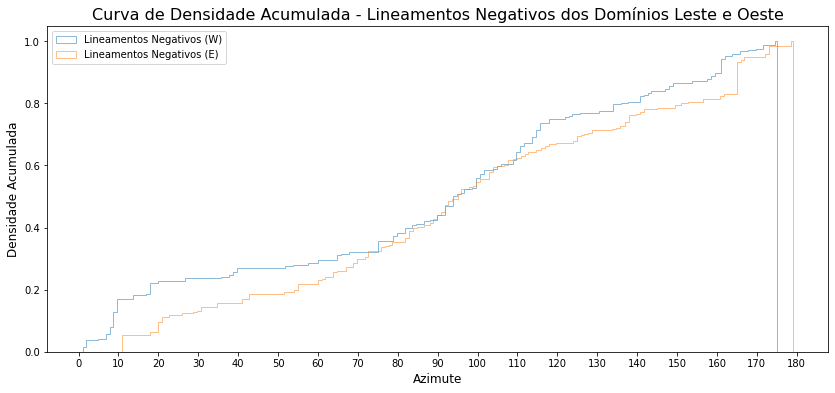

In [93]:
# Curva de Densidade Acumulada:
plt.figure(figsize=(14,6))
plt.hist(lin_neg_w.TREND_PADRONIZADO, bins=360, alpha=0.5, label="Lineamentos Negativos (W)",
         cumulative=True,density=True,histtype="step")
plt.hist(lin_neg_e.TREND_PADRONIZADO, bins=360, alpha=0.5, label="Lineamentos Negativos (E)",
         cumulative=True,density=True,histtype="step")

plt.xlabel("Azimute", size=12)
plt.xticks(np.arange(0,190,step=10))
plt.ylabel("Densidade Acumulada", size=12)
plt.title("Curva de Densidade Acumulada - Lineamentos Negativos dos Domínios Leste e Oeste",
          size=16)
plt.legend(loc='upper left')

#plt.savefig("cum_lin_neg_E_W.jpg",dpi=300,format="jpg",bbox_inches="tight")
plt.show()

#### Teste de Kolmogorov-Smirnov Biamostral

- Esse teste fora executado para verificar se os lineamentos negativos das porções E e W pertencem a uma mesma distribuição

- Pode ser realizados para variáveis discretas

- **H0**: as duas amostras são oriundas da mesma distribuição

- **Ha**: as duas amostras NÃO são oriundas da mesma distribuição

- **Conclusão**: como **p-valor <<< 0.01**, há fortes evidências para **REJEITAR** H0. Portanto, os lineamentos negativos das porções E e W não pertencem a uma mesma distribuição e não podem ser tratados como um só grupo

In [94]:
# Teste de Kolmogorov-Smirnov:
stats.ks_2samp(data1=lin_neg_w.TREND,data2=lin_neg_e.TREND)

Ks_2sampResult(statistic=0.17134416543574593, pvalue=1.0194634025850746e-09)

### Simulação dos Dados

- Foi realizada uma simulação com amostras fictícias para verificar a performance do Teste KS Biamostral para os dados de lineamentos

In [95]:
from numpy.random import normal
import random

In [96]:
# Função que gera dados normalmente distribuídos:

def gerador_normal(mean,sd,n):
  a = normal(loc=mean,scale=sd,size=100000)

  lista =[]
  for i in range(len(a)):
    if 0 <= a[i] <= 179:
      lista.append(a[i])

  b = random.sample(lista,n)
  c = round(pd.Series(b))
  return np.array(c)

In [122]:
# Criação de duas amostras de distribuições distintas:
dados_e = gerador_normal(80,15,925)
dados_w = gerador_normal(100,30,707)

In [123]:
stats.ks_2samp(data1=dados_e,data2=dados_w)

Ks_2sampResult(statistic=0.4406896288084407, pvalue=5.070326886570781e-68)

## Comparação entre Lineamentos e Medidas Estruturais

- Essas comparações foram feitas apenas para o domínio E, onde há uma densidade significativa de medidas estruturais

### Lineamentos Positivos x Direções de S0

- Há uma significativa relação entre os lineamentos positivos e a direção das camadas de S0

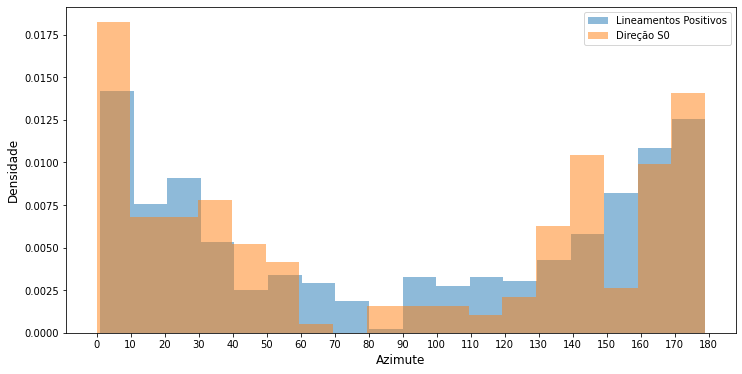

In [101]:
# Histogramas (domínio E):
plt.figure(figsize=(12,6))
plt.hist(lin_pos_e.TREND_PADRONIZADO, bins=18, alpha=0.5, label="Lineamentos Positivos",
         density=True)
plt.hist(S0_E.DIRECAO, bins=18, alpha=0.5, label="Direção S0",density=True)

plt.xlabel("Azimute", size=12)
plt.xticks(np.arange(0,190,step=10))
plt.ylabel("Densidade", size=12)
plt.legend(loc='upper right')

#plt.savefig("hist_lin_pos_S0_dir.jpg",dpi=300,format="jpg",bbox_inches="tight")
plt.show()

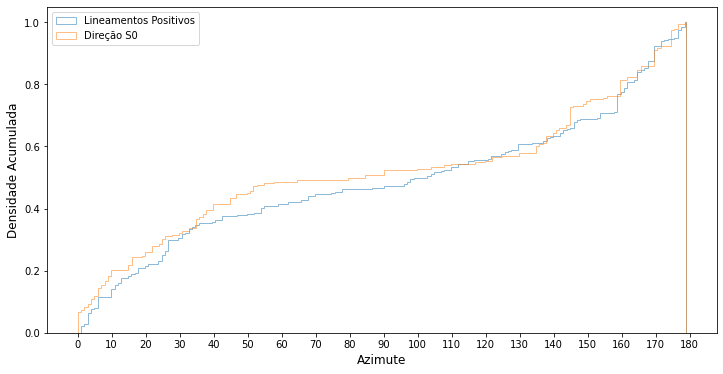

In [102]:
# Curva de Densidade Acumulada (Domínio E):
plt.figure(figsize=(12,6))
plt.hist(lin_pos_e.TREND_PADRONIZADO, bins=360, alpha=0.5, label="Lineamentos Positivos",
         cumulative=True,density=True,histtype="step")
plt.hist(S0_E.DIRECAO, bins=360, alpha=0.5, label="Direção S0",
         cumulative=True,density=True,histtype="step")

plt.xlabel("Azimute", size=12)
plt.xticks(np.arange(0,190,step=10))
plt.ylabel("Densidade Acumulada", size=12)
plt.legend(loc='upper left')

#plt.savefig("cum_lin_pos_S0_dir.jpg",dpi=300,format="jpg",bbox_inches="tight")
plt.show()

### Lineamentos Positivos x Direções de SN

- Há uma ligeira relação entre os lineamentos positivos e as direções de foliação

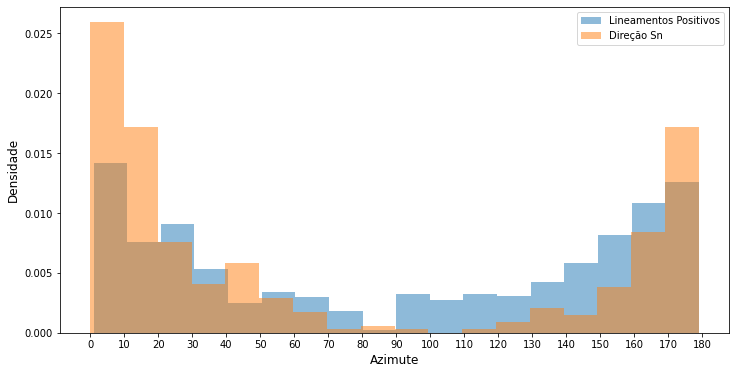

In [103]:
# Histogramas (Domínio E):
plt.figure(figsize=(12,6))
plt.hist(lin_pos_e.TREND_PADRONIZADO, bins=18, alpha=0.5, label="Lineamentos Positivos",
         density=True)
plt.hist(SN_E.DIRECAO, bins=18, alpha=0.5, label="Direção Sn",density=True)

plt.xlabel("Azimute", size=12)
plt.xticks(np.arange(0,190,step=10))
plt.ylabel("Densidade", size=12)
plt.legend(loc='upper right')

#plt.savefig("hist_lin_pos_Sn_dir.jpg",dpi=300,format="jpg",bbox_inches="tight")
plt.show()

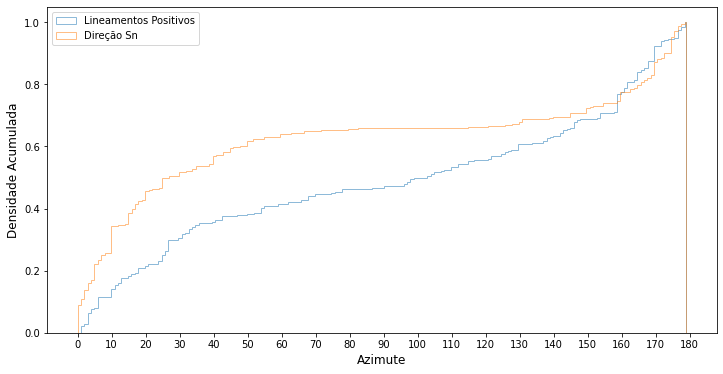

In [104]:
# Curva de Densidade Acumulada (Domínio E):
plt.figure(figsize=(12,6))
plt.hist(lin_pos_e.TREND_PADRONIZADO, bins=360, alpha=0.5, label="Lineamentos Positivos",
         cumulative=True,density=True,histtype="step")
plt.hist(SN_E.DIRECAO, bins=360, alpha=0.5, label="Direção Sn",
         cumulative=True,density=True,histtype="step")

plt.xlabel("Azimute", size=12)
plt.xticks(np.arange(0,190,step=10))
plt.ylabel("Densidade Acumulada", size=12)
plt.legend(loc='upper left')

#plt.savefig("cum_lin_pos_Sn_dir.jpg",dpi=300,format="jpg",bbox_inches="tight")
plt.show()

### Lineamentos Negativos x Sentido de S0

- Há uma ligeira relação entre os lineamentos negativos e o sentido de mergulho do acamamento. Entretanto, há alguns lineamentos negativos (NNW e NNE) que não apresentam relação com o sentido de mergulho do acamamento

- Esses lineamentos negativos NNW e NNE podem corresponder às direções do acamamento 

In [105]:
# Aplicação da função que padroniza o sentido de mergulho das estruturas planares:
S0["DIP_DIR_PADRAO"] = S0["DIP_DIR"].map(padronizar)
SN_ESP["DIP_DIR_PADRAO"] = SN_ESP["DIP_DIR"].map(padronizar)
SN_CBH["DIP_DIR_PADRAO"] = SN_CBH["DIP_DIR"].map(padronizar)
SN["DIP_DIR_PADRAO"] = SN["DIP_DIR"].map(padronizar)
S0_E["DIP_DIR_PADRAO"] = S0_E["DIP_DIR"].map(padronizar)
SN_E["DIP_DIR_PADRAO"] = SN_E["DIP_DIR"].map(padronizar)

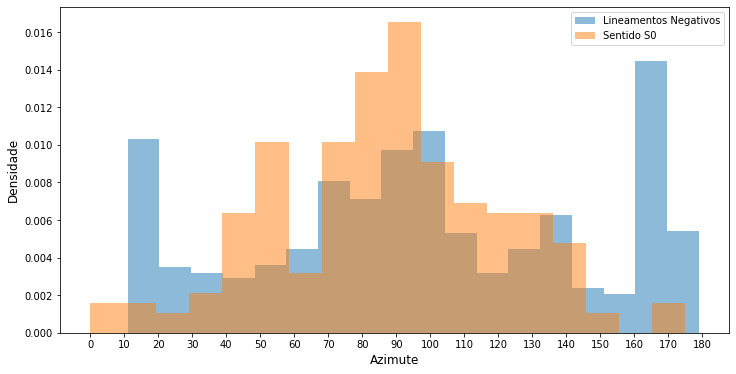

In [106]:
# Histogramas (Domínio E):
plt.figure(figsize=(12,6))
plt.hist(lin_neg_e.TREND_PADRONIZADO, bins=18, alpha=0.5, label="Lineamentos Negativos",
         density=True)
plt.hist(S0_E.DIP_DIR_PADRAO, bins=18, alpha=0.5, label="Sentido S0",density=True)

plt.xlabel("Azimute", size=12)
plt.xticks(np.arange(0,190,step=10))
plt.ylabel("Densidade", size=12)
plt.legend(loc='upper right')

#plt.savefig("hist_lin_neg_S0_dip.jpg",dpi=300,format="jpg",bbox_inches="tight")
plt.show()

### Lineamentos Negativos x Sentido de SN

- Há uma ligeira relação entre os lineamentos negativos e o sentido de mergulho da foliação. Entretanto, há alguns lineamentos negativos (NNW e NNE) que não apresentam relação com o sentido de mergulho da foliação.

- Esses lineamentos negativos NNW e NNE podem corresponder às direções da foliação 

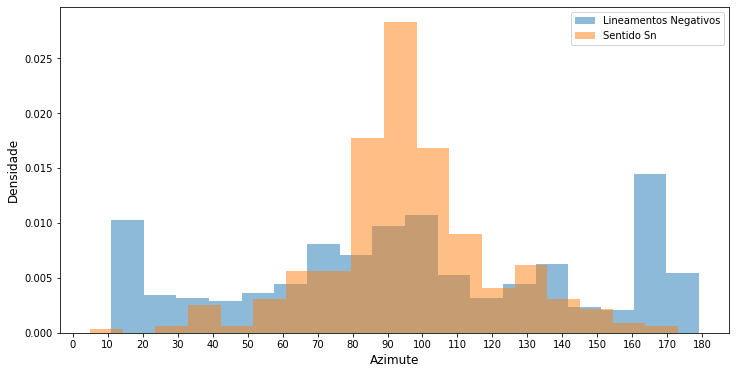

In [107]:
# Histogramas (Domínio E):
plt.figure(figsize=(12,6))
plt.hist(lin_neg_e.TREND_PADRONIZADO, bins=18, alpha=0.5, label="Lineamentos Negativos",
         density=True)
plt.hist(SN_E.DIP_DIR_PADRAO, bins=18, alpha=0.5, label="Sentido Sn",density=True)

plt.xlabel("Azimute", size=12)
plt.xticks(np.arange(0,190,step=10))
plt.ylabel("Densidade", size=12)
plt.legend(loc='upper right')

#plt.savefig("hist_lin_neg_Sn_dip.png",dpi=300,format="png",bbox_inches="tight")
plt.show()

## Comparação entre Medidas de Acamamento e Foliação

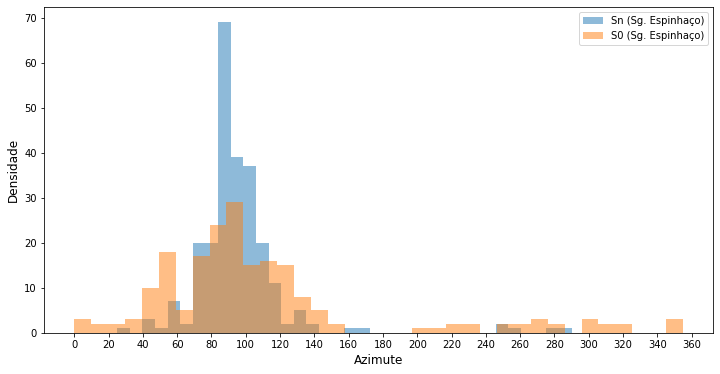

In [108]:
# Histograma:
plt.figure(figsize=(12,6))
plt.hist(SN_ESP.DIP_DIR, bins=36, alpha=0.5, label="Sn (Sg. Espinhaço)")
plt.hist(S0.DIP_DIR, bins=36, alpha=0.5, label="S0 (Sg. Espinhaço)")

plt.xlabel("Azimute", size=12)
plt.xticks(np.arange(0,370,step=20))
plt.ylabel("Densidade", size=12)
plt.legend(loc='upper right')

#plt.savefig("hist_S0_Sn_ESP.png",dpi=300,format="png",bbox_inches="tight")
plt.show()

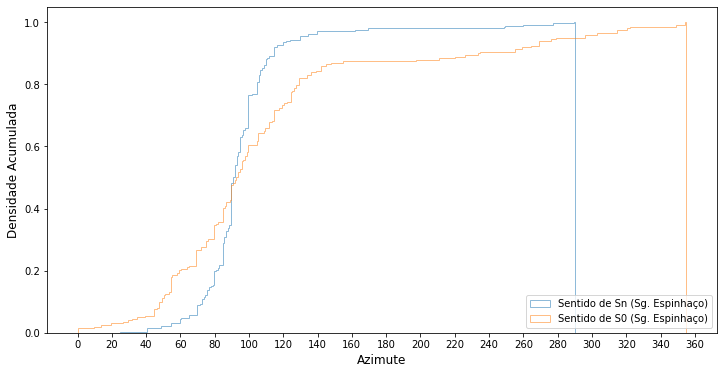

In [109]:
# Curva de frequência acumulada:
plt.figure(figsize=(12,6))
plt.hist(SN_ESP.DIP_DIR, bins=360, alpha=0.5, label="Sentido de Sn (Sg. Espinhaço)",stacked=True,
         cumulative=True,density=True,histtype="step")
plt.hist(S0.DIP_DIR, bins=360, alpha=0.5, label="Sentido de S0 (Sg. Espinhaço)",stacked=True,
         cumulative=True,density=True,histtype="step")

plt.xlabel("Azimute", size=12)
plt.xticks(np.arange(0,370,step=20))
plt.ylabel("Densidade Acumulada", size=12)
plt.legend(loc='lower right')

#plt.savefig("cum_S0_Sn_ESP.png",dpi=300,format="png",bbox_inches="tight")
plt.show()

## Exportação de Medidas para Stereonet

In [110]:
# Exportação de atitudes de foliação para formato Stereonet:

#SN.to_csv("SN.csv",sep="\t",header=True,index=False)

In [111]:
# Exportação de atitudes de foliação ESP para formato Stereonet:

#SN_ESP.to_csv("SN_ESP.csv",sep="\t",header=True,index=False)

In [112]:
# Exportação de atitudes de foliação CBH para formato Stereonet:

#SN_CBH.to_csv("SN_CBH.csv",sep="\t",header=True,index=False)

In [113]:
# Exportação de atitudes de acamamento para formato Stereonet:

#S0.to_csv("S0.csv",sep="\t",header=True,index=False)

In [114]:
# Exportação de atitudes de Lineação para formato Stereonet:

#LN.to_csv("LN.csv",sep="\t",header=True,index=False)

In [115]:
# Exportação de atitudes de Lineação ESP para formato Stereonet:

#LN_ESP.to_csv("LN_ESP.csv",sep="\t",header=True,index=False)

In [116]:
# Exportação de atitudes de Lineação CBH para formato Stereonet:

#LN_CBH.to_csv("LN_CBH.csv",sep="\t",header=True,index=False)

In [117]:
# Exportação de atitudes de Fratura para formato Stereonet:

#F.to_csv("F.csv",sep="\t",header=True,index=False)

In [118]:
# Exportação de atitudes de Eixo para formato Stereonet:

#E.to_csv("E.csv",sep="\t",header=True,index=False)

In [119]:
# Exportação de atitudes de Veio para formato Stereonet:

#V.to_csv("V.csv",sep="\t",header=True,index=False)